## **¿Que es el Machine Learning?**

Todo mundo tiene su propia definición de lo que es o debería ser Machine Learning, sin embargo para fines de este curso, nos referiremos al **Machine Learning** como el conjunto de técnicas y algoritmos para la creación de $\underline{modelos}$ que *aprenden de los datos*. Los clasificamos en 4 tipos diferentes:

*   Supervisado
*   Semi-supervisado
*   No-supervisado
*   Reforzado







A pesar de ello la mayoría de las personas en la actualidad tiene una idea errónea y se imagina a la inteligencia artifical como un robot que tiene conciencia propia de lo que se le fue encomendado como tarea a realizar. Pero la IA o en un caso muy particular el **Machine Learning** ya se encuentra en nuestra actualidad, más cerca de lo que pensamos, la mayoría si no es que todos los servicios de Google, Facebook, Apple y compañías como Amazon la aplican para optimizar, recabar información, recopilar datos y procesarlos a manera que puedan ser usados por un modelo con un propósito en particular. Ya sea que nos encontremos viendo algún video en YouTube a manera de sistema de recomendación, o bien identificando para identificar patrones de comportamiento, puede ser en la bolsa de valores, los hábitos de compra de algún servicio, producto o bien en general. En el procesamiento de imágenes, la identificación de objetos, o reconocimiento de emociones. En el hábito del procesamiento del lenguaje natural Google es un buen ejemplo, ya que su traductor esta basado en la internet y el modelo que usa da por resultado, la frase que más se adapte al significado de lo que queramos traducir.



### **¿Cuál es el propósito del Machine Learning?**

A pesar de que pareciera ser muy general, podemos zanjar la discrepancia que existe para la mayoría de problemas que el **Machine Learning** puede resolver. De manera muy específica es usado para los siguientes problemas:

1.   Clasificación
2.   Regresión

### **Aprendizaje supervisado** 

Es el tipo de aprendizaje, cuyo set de entrenamiento contiene la solución deseada. Algunos tipos de algoritmos de aprendizaje supervisado son:

*   Regresión Lineal
*   Regresión Lógistica
*   k-Vecinos Cercanos
*   Máquinas de Soporte Vectorial
*   Árboles de Decisión
*   Redes Neuronales Artificiales 


https://playground.tensorflow.org/

In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

# plt.rcParams["font.family"] = "cursive"
plt.rcParams["font.size"] = 24

from sklearn.datasets import make_circles

(500, 1)


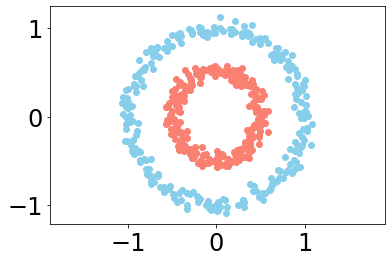

In [2]:
# CREAR EL DATASET

n = 500
p = 2

X, Y = make_circles(n_samples=n, factor=0.5, noise=0.05)

Y = Y[:, np.newaxis]

print(Y.shape)

plt.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1], c="skyblue")
plt.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], c="salmon")
plt.axis("equal")
plt.show()

#### **Regresión Lineal Simple**




*   En **estadística** la regresión lineal o ajuste lineal es un modelo
matemático usado para aproximar la relación de dependencia entre una variable dependiente $y$, las variables independientes $x_{i}$ y un término aleatorio $\epsilon$ (fuente: https://es.wikipedia.org/wiki/Regresi%C3%B3n_lineal )

*   En **machine learning** la regresion lineal es una técnica paramétrica que pertenece al conjunto de algortimos de aprendizaje supervisado. El aprendizaje consiste en encontrar cuáles son los *mejores* parámetros que permitan obtener la *mejor* relación de dependencia entre las variables  

**Visualicemos los datos**

* Supongamos que tenemos la siguiente relación funcional : $f(x) = \frac{1}{10}x  + \frac{5}{4} + \epsilon $. El coeficiente $\epsilon$ tiene como objetivo darle estocasticidad a la variable independiente. 

In [3]:
plt.style.use("seaborn-poster")

In [4]:
def f(x, epsilon):  # Función f(x) = 0.5*x + 1.25 + epsilon*ruido_gaussiano
    np.random.seed(1)  # Definimos la semilla
    y = 0.1 * x + 1.25 + epsilon * np.random.randn(x.shape[0])
    return y


def getLines(n, x, label=False):
    for ni in range(n):
        m = 0.1 + np.random.normal(0, 0.025)
        b = 1.25 + np.random.normal(0, 0.025)
        y = m * x + b

        if label:
            plt.plot(x, y, "--", label="f(x) = {0:.2f}x + {1:.2f}".format(m, b))
            plt.legend()
        else:
            plt.plot(x, y)

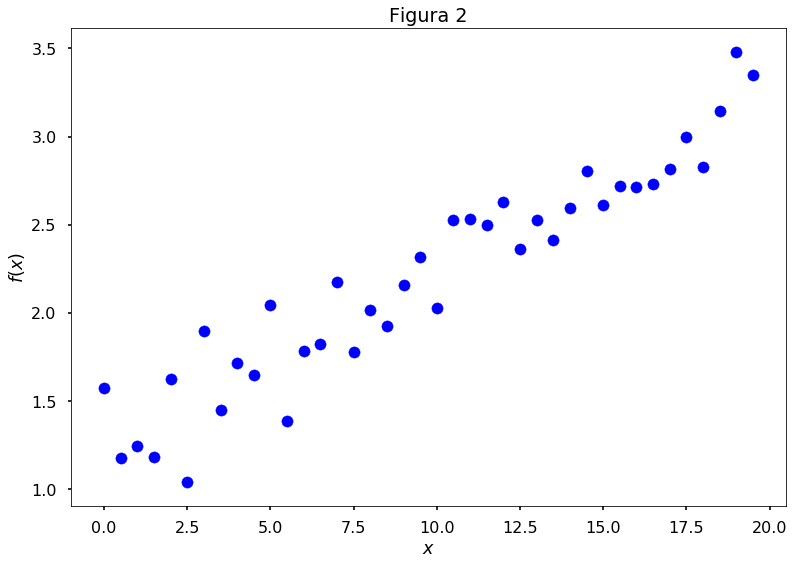

In [5]:
""" Generamos valores de la variable dependiente x """

x = np.arange(0, 20, 0.5)  # generamos valores x de 0 a 20 en intervalos de 0.5 -> [0,0.5,.....,15]
y = f(x, 0.2)  # calculamos y, a partir de la función que hemos generado

# Hacemos un gráfico de los datos que hemos generado
plt.scatter(x, y, label="data", color="blue")
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.title("Figura 2")
plt.show()

* ¿Cuantas funciones de la forma $f(x) = mx + b$ puedo ajustar en los datos de la figura 2? 

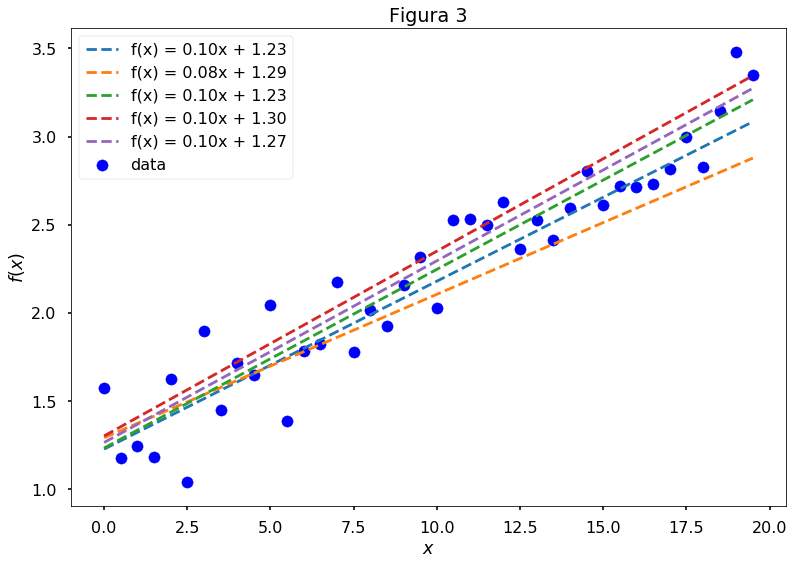

In [6]:
plt.scatter(x, y, label="data", color="blue")
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.title("Figura 3")

n_functions = 5  # Número de ajustes
getLines(n_functions, x, label=True)
plt.show()

* $f(x) = mx + b$ tiene como parámetros a los coeficientes $m$ y $b$. Dichos coeficientes controlan el comportamiento de la función $f(x)$. Por ejemplo, el parámetro $m$ controla la inclinación (ángulo con respecto a la horizontal) y el parámetro $b$ controla el desfase del origen de la variable dependiente.

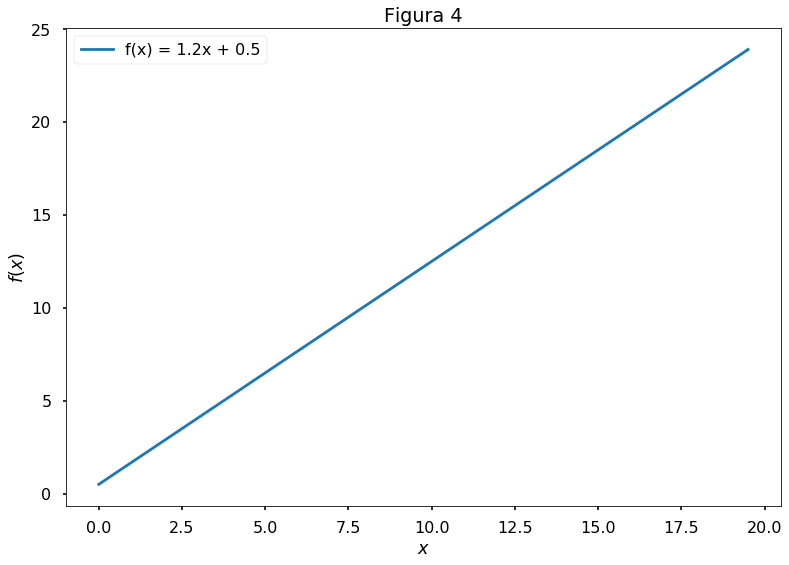

In [7]:
# Definimos el parámetro m
m = 1.2
# Definimos el parámetro b
b = 0.5

# Construimos la función f(x) = mx + b
f = m * x + b

plt.plot(x, f, label="f(x) = {0}x + {1}".format(m, b))
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.legend()
plt.title("Figura 4")
plt.show()

Dado un algoritmo paramétrico como la regresión lineal, el objetivo del **machine learning** es encontar los parámetros más **óptimos** que logren captar la relación de dependiencia entre las variables dependiente e independientes.

### **Entrenando un modelo de Regresión Lineal sklearn**

Entrenar: Encontrar los parámetros del modelo que mejor se ajusten a los datos





In [8]:
# Importamos la clase de Regresión Lineal de scikit-learn
from sklearn.linear_model import LinearRegression

regresion_lineal = LinearRegression()  # creamos una instancia de LinearRegression

# Llamamos al método fit para entrenar el modelo
regresion_lineal.fit(x.reshape(-1, 1), y)

# parámetros que ha encontrado la regresión lineal
m_train, b_train = regresion_lineal.coef_, regresion_lineal.intercept_
print("w = " + str(m_train[0]) + ", b = " + str(b_train))

w = 0.10079971514219091, b = 1.2242831824498634


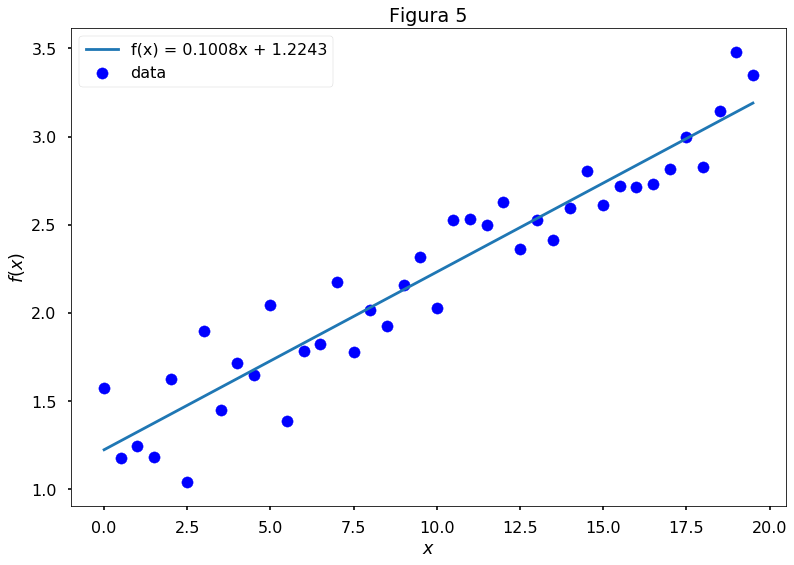

In [9]:
# Visualizamos los datos y el modelo entrenado
plt.scatter(x, y, label="data", color="blue")

f = m_train * x + b_train  # Modelo entrenado

plt.plot(x, f, label="f(x) = {0:.4f}x + {1:.4f}".format(m_train[0], b_train))
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.legend()
plt.title("Figura 5")
plt.show()

#### **Ejercicios de Regresión Múltiple Lineal**

* Vamos a extener ahora el modelo paramétrico antes trabajado, agregando un parametro más. Ahora, tenemos dos variables independientes y una variable dependiente, con tres parámetros que controlan el comportamiento de la función.

**Visualicemos los datos**

* Supongamos que tenemos la siguiente relación funcional : $f(x,y) = \frac{1}{10}x  + \frac{1}{4}y + \frac{5}{4}  + \epsilon $


In [10]:
def f(x, y, epsilon):  # función f(x) = 0.5*x + 1.25 + epsilon*ruido_gaussiano
    np.random.seed(1)  # Definimos la semilla
    z = 0.1 * x + 0.25 * y + 1.25 + epsilon * np.random.randn(x.shape[0])
    return z

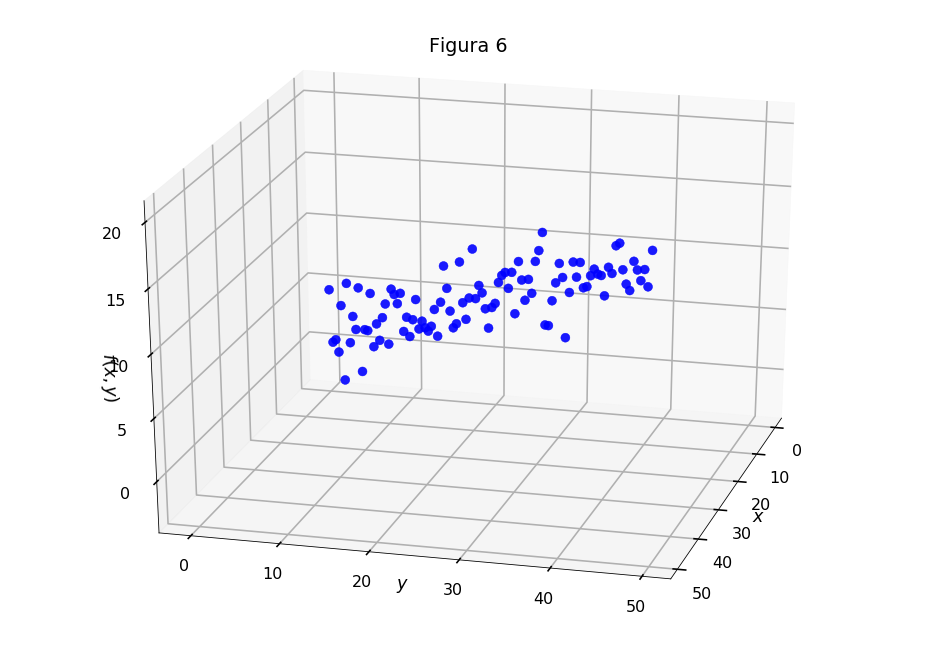

In [11]:
""" Grafica de puntos en 3d """

fig = plt.figure()
from mpl_toolkits.mplot3d import Axes3D

ax = Axes3D(fig)

# Construimos los datos sintéticos
x = np.arange(0, 50, 0.5)
y = np.arange(0, 50, 0.5)
f_xy = f(x, y, epsilon=2)


# Graficámos los puntos
ax.scatter(x, y, f_xy, alpha=0.9, cmap="hot", color="blue", s=80)

ax.view_init(elev=25.0, azim=15)

ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$f(x,y)$")
ax.set_title("Figura 6")
plt.show()

**Entrenando un modelo de Regresión Lineal múltiple sklearn**

Se dice múltiple cuando el número de parámetros es mayor a dos

0.1816837305619698 0.18168373056196985 1.0403210413338915


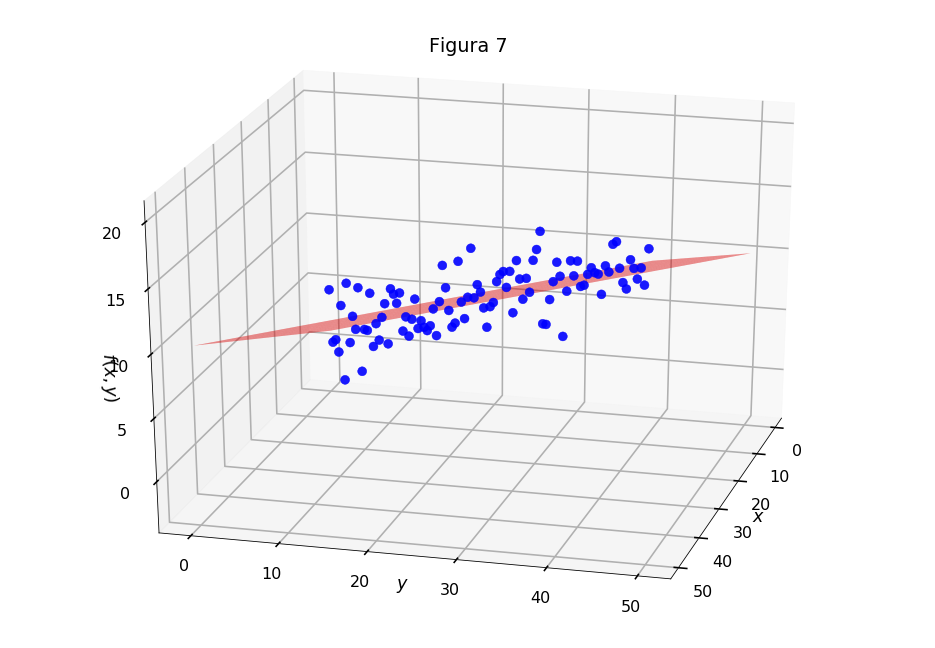

In [12]:
fig = plt.figure()
ax = Axes3D(fig)

regr2 = LinearRegression()  # Instanciamos un modelo lineal

XY = np.stack((x, y), axis=1)  # Concatenamos horizontalmente los datos
regr2.fit(XY, f_xy)  # Entrenamos el modelo

# Creamos una malla, sobre la cual graficaremos el plano
xx, yy = np.meshgrid(np.linspace(0, 50, num=20), np.linspace(0, 50, num=20))

# calculamos los valores del plano para los puntos x e y
a = regr2.coef_[0]
b = regr2.coef_[1]
c = regr2.intercept_

print(a, b, c)
nuevoX = a * xx
nuevoY = b * yy

# Calculamos los calores para z. Debemos sumar el punto de intersección
z = nuevoX + nuevoY + c

# Graficámos el plano
ax.plot_surface(xx, yy, z, alpha=0.5, color="red")

# Graficámos los puntos
ax.scatter(x, y, f_xy, alpha=0.9, cmap="hot", color="blue", s=80)

ax.view_init(elev=25.0, azim=15)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$f(x,y)$")
ax.set_title("Figura 7")
plt.show()

* En este caso, tenemos que el modelo paramétrico tiene como parámetros a los coeficientes $a,b,c$ de la función : $f(x,y) = ax +by + c$

* De acuerdo con la Figura 7, el modelo entrenado con sklearn, tiene como función el siguiente plano: 
$f(x,y) = (0.20848)x +(0.208418)y + 0.20160$

* Naturalmente, la regresión lineal se puede extender a "$n$" número de parámetros "$\theta$" con "$n-1$" variables dependientes $x$. Podemos expresar entonces a la regresión lineal múltiple con "$n$" parámetros como: 
$f(x_{1},x_{2},...,x_{n-1}) = \theta_{1}x_{1} +  ... + \theta_{n-1}x_{n-1} + \theta_{n}$



Preguntas :
1. ¿Cómo encuentro, estimo o calculo los parámetros del modelo?
2. ¿Cuál es el objetivo de la regresión lineal? ¿Para que me sirve? ¿Qué modela o que no modela?
3. ¿Por qué la regresión lineal entra en el grupo de algoritmos de **machine learning** como aprendizaje supervisado?
4. ¿Por qué la regresión lineal entra como un algoritmo de aprendizaje?